In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## MLR

In [2]:
admit = pd.read_csv("https://raw.githubusercontent.com/sumeet020/chance-of-admit/main/Admission_Prediction.csv")
admit.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
admit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
admit.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


array([[<AxesSubplot:title={'center':'Serial No.'}>,
        <AxesSubplot:title={'center':'GRE Score'}>,
        <AxesSubplot:title={'center':'TOEFL Score'}>],
       [<AxesSubplot:title={'center':'University Rating'}>,
        <AxesSubplot:title={'center':'SOP'}>,
        <AxesSubplot:title={'center':'LOR '}>],
       [<AxesSubplot:title={'center':'CGPA'}>,
        <AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Chance of Admit '}>]], dtype=object)

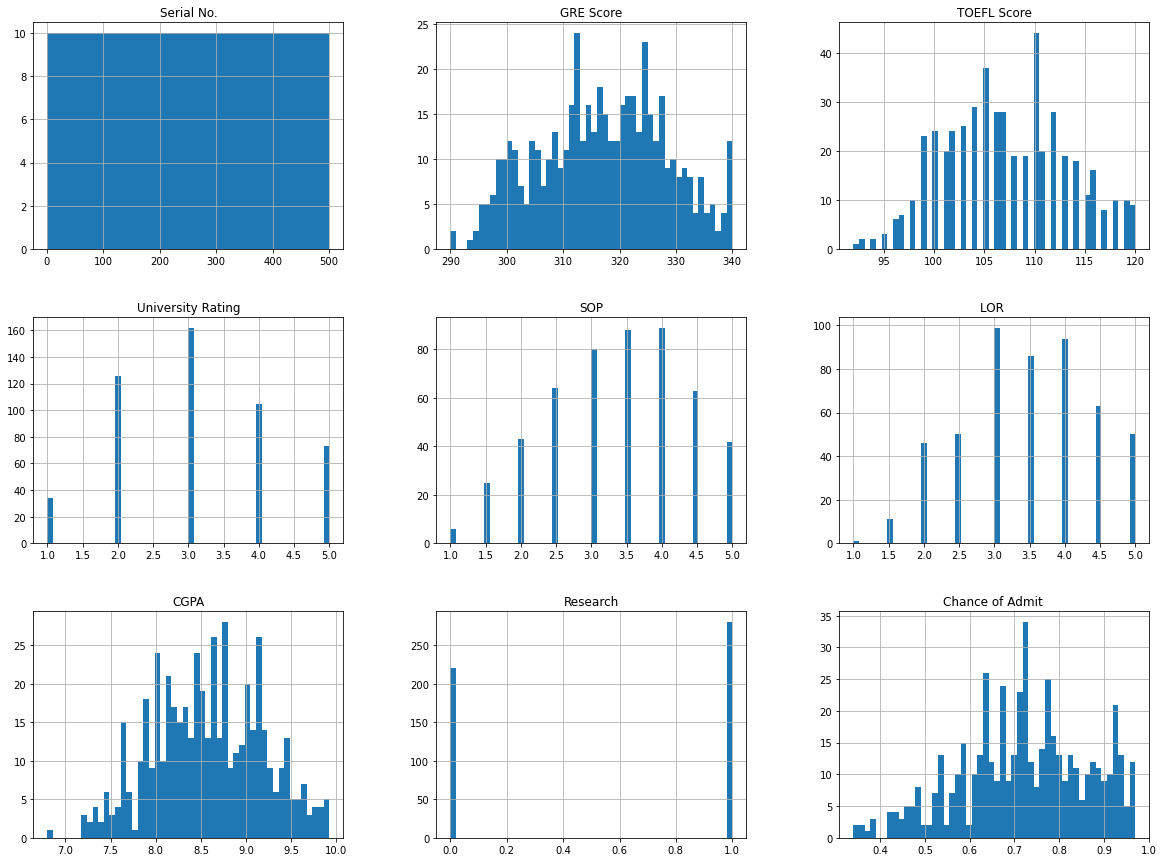

In [5]:
admit.hist(bins=50 ,figsize=(20,15))

In [6]:
corr_matrix = admit.corr()
corr_matrix['Chance of Admit '].sort_values(ascending=False)

Chance of Admit      1.000000
CGPA                 0.882413
GRE Score            0.810351
TOEFL Score          0.792228
University Rating    0.690132
SOP                  0.684137
LOR                  0.645365
Research             0.545871
Serial No.           0.008505
Name: Chance of Admit , dtype: float64

In [7]:
Admit_df = pd.DataFrame(admit)
Admit_df_f = Admit_df.drop('Serial No.', axis=1)
Admit_df_f.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
corr_matrix = Admit_df_f.corr()
corr_matrix['Chance of Admit '].sort_values(ascending=False)

Chance of Admit      1.000000
CGPA                 0.882413
GRE Score            0.810351
TOEFL Score          0.792228
University Rating    0.690132
SOP                  0.684137
LOR                  0.645365
Research             0.545871
Name: Chance of Admit , dtype: float64

In [9]:
from sklearn.preprocessing import StandardScaler
# Naming the features
features = ['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']

# Separating out the features
X = Admit_df_f.loc[:,features].values

# Separating out the target
Y = Admit_df_f.loc[:,['Chance of Admit ']].values
Y = Admit_df_f['Chance of Admit ']

# Standardizing the features
X = StandardScaler().fit_transform(X)

In [10]:
# Splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(400, 7)
(100, 7)
(400,)
(100,)


In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_train_predict =model.predict(X_train)
mse = mean_squared_error(Y_train, y_train_predict)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set:")
print("\n")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set:")
print("\n")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set:


MSE is 0.0035265554784557574
RMSE is 0.059384808482100516
R2 score is 0.8210671369321554


The model performance for testing set:


MSE is 0.0035265554784557574
RMSE is 0.060865880415783113
R2 score is 0.8188432567829629


## RFR

In [13]:
admission = pd.read_csv("https://raw.githubusercontent.com/sumeet020/chance-of-admit/main/Admission_Prediction.csv")
admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [14]:
admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [15]:
admission.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


array([[<AxesSubplot:title={'center':'Serial No.'}>,
        <AxesSubplot:title={'center':'GRE Score'}>,
        <AxesSubplot:title={'center':'TOEFL Score'}>],
       [<AxesSubplot:title={'center':'University Rating'}>,
        <AxesSubplot:title={'center':'SOP'}>,
        <AxesSubplot:title={'center':'LOR '}>],
       [<AxesSubplot:title={'center':'CGPA'}>,
        <AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Chance of Admit '}>]], dtype=object)

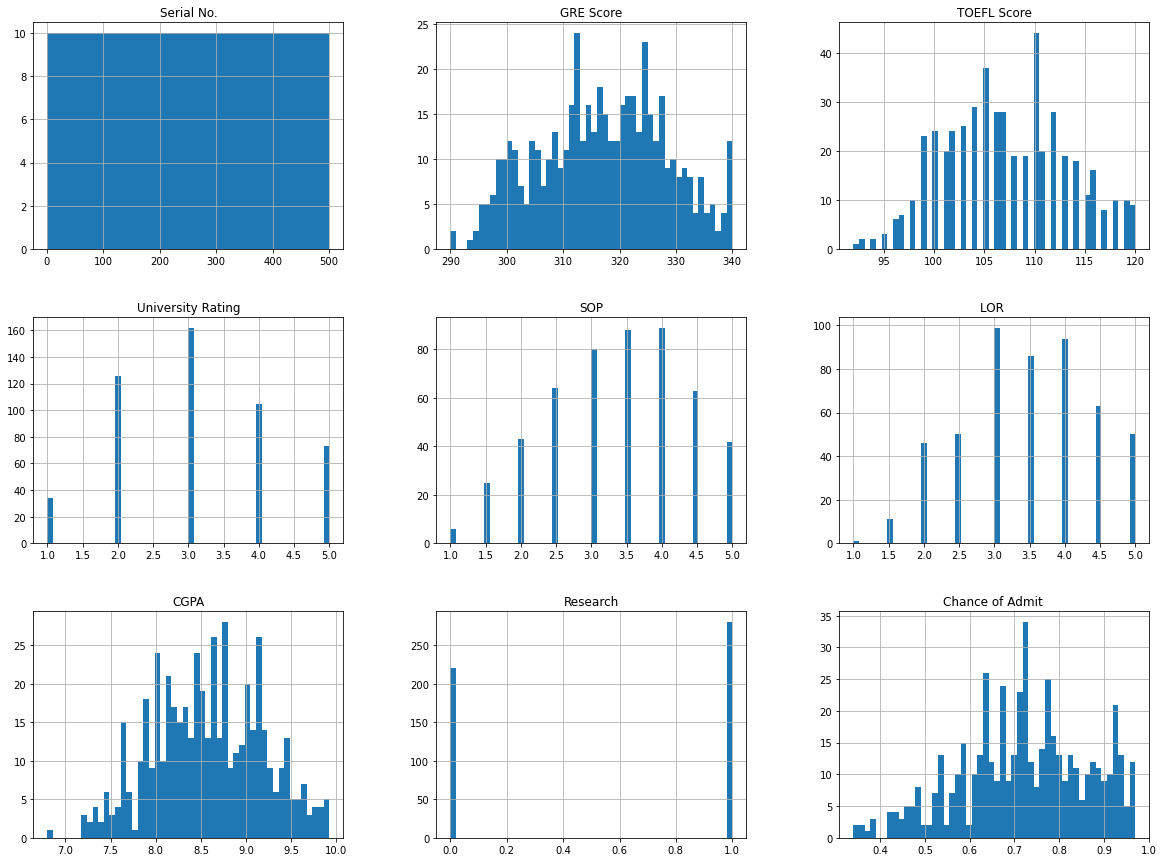

In [16]:
admission.hist(bins=50 ,figsize=(20,15))

In [17]:
corr_matrix = admission.corr()
corr_matrix['Chance of Admit '].sort_values(ascending=False)

admission_df = pd.DataFrame(admission)
admission_f = admission_df.drop('Serial No.', axis=1)
admission_f.describe()

corr_matrix = admission_f.corr()
corr_matrix['Chance of Admit '].sort_values(ascending=False)

Chance of Admit      1.000000
CGPA                 0.882413
GRE Score            0.810351
TOEFL Score          0.792228
University Rating    0.690132
SOP                  0.684137
LOR                  0.645365
Research             0.545871
Name: Chance of Admit , dtype: float64

In [18]:
from sklearn.preprocessing import StandardScaler
# Naming the features
features = ['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']

# Separating out the features
X = admission_f.loc[:,features].values

# Separating out the target
Y = admission_f.loc[:,['Chance of Admit ']].values
Y = admission_f['Chance of Admit ']

# Standardizing the features
X = StandardScaler().fit_transform(X)

In [19]:
# Splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(400, 7)
(100, 7)
(400,)
(100,)


In [20]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,Y_train)

RandomForestRegressor()

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_train_predict =model.predict(X_train)
mse = mean_squared_error(Y_train, y_train_predict)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set:")
print("\n")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set:")
print("\n")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set:


MSE is 0.0005891913750000002
RMSE is 0.024273264613561978
R2 score is 0.9701051918032507


The model performance for testing set:


MSE is 0.0005891913750000002
RMSE is 0.06463962020309214
R2 score is 0.7956831051344745


## MLR with PCA

In [22]:
admit = pd.read_csv("https://raw.githubusercontent.com/sumeet020/chance-of-admit/main/Admission_Prediction.csv")
admit.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [23]:
admit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [24]:
admit.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


array([[<AxesSubplot:title={'center':'Serial No.'}>,
        <AxesSubplot:title={'center':'GRE Score'}>,
        <AxesSubplot:title={'center':'TOEFL Score'}>],
       [<AxesSubplot:title={'center':'University Rating'}>,
        <AxesSubplot:title={'center':'SOP'}>,
        <AxesSubplot:title={'center':'LOR '}>],
       [<AxesSubplot:title={'center':'CGPA'}>,
        <AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Chance of Admit '}>]], dtype=object)

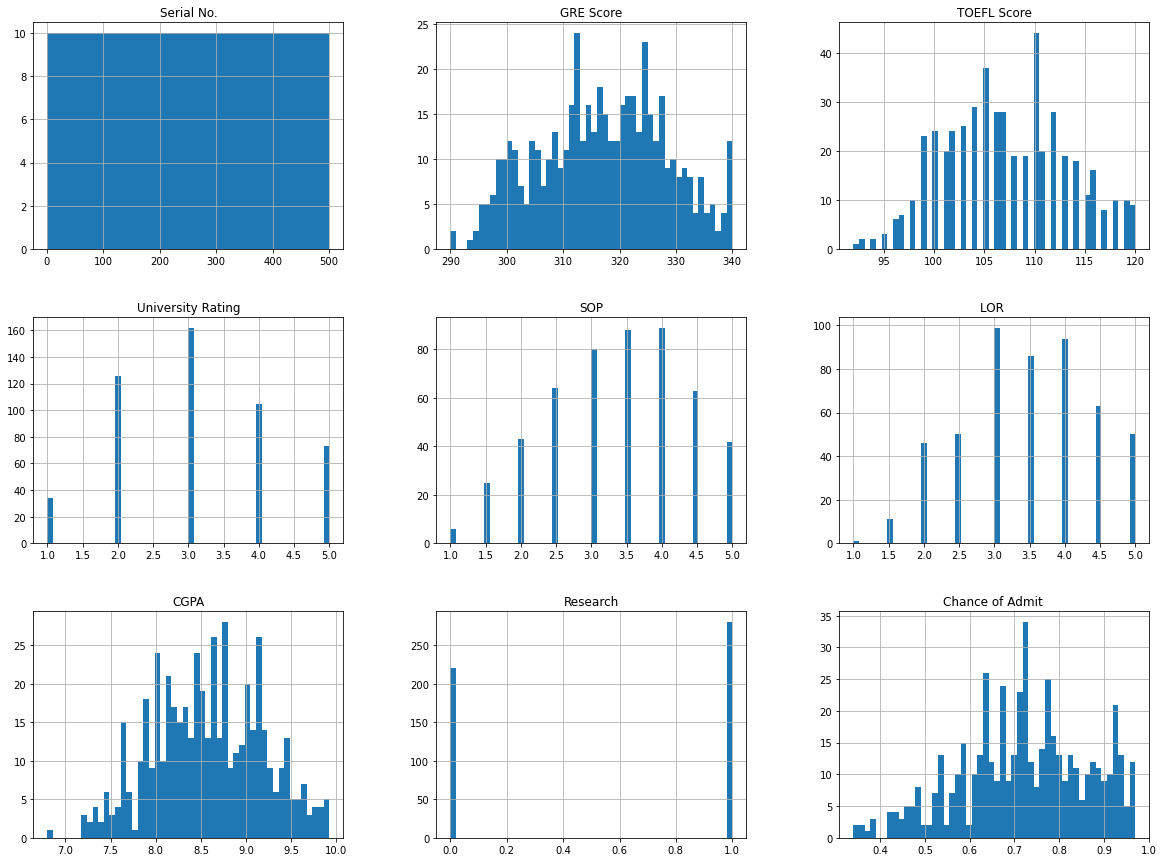

In [25]:
admit.hist(bins=50 ,figsize=(20,15))

In [26]:
corr_matrix = admit.corr()
corr_matrix['Chance of Admit '].sort_values(ascending=False)

Chance of Admit      1.000000
CGPA                 0.882413
GRE Score            0.810351
TOEFL Score          0.792228
University Rating    0.690132
SOP                  0.684137
LOR                  0.645365
Research             0.545871
Serial No.           0.008505
Name: Chance of Admit , dtype: float64

In [27]:
Admit_df = pd.DataFrame(admit)
Admit_df_f = Admit_df.drop('Serial No.', axis=1)
Admit_df_f.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [28]:
# Min-Max Scalar Pre-processing 
from sklearn.preprocessing import MinMaxScaler
# define data
data = Admit_df_f
# define min max scaler
scaler = MinMaxScaler()
# transform data
Admit_df_f_s = scaler.fit_transform(data)

In [29]:
from sklearn.decomposition import PCA
# Determining principal components
pca = PCA(n_components=6)    #replace it with 6
PrincipalComponents = pca.fit_transform(Admit_df_f_s)
newdf = pd.DataFrame(data = PrincipalComponents, columns = ['pca1', 'pca2','pca3','pca4','pca5','pca6'])

Admit_df_final = pd.concat([newdf,admit[['Chance of Admit ']]], axis = 1)

In [30]:
Admit_df_final.head()

,pca1,pca2,pca3,pca4,pca5,pca6,Chance of Admit
0,-0.909719,-0.194661,0.203611,-0.094507,0.031020,0.047522,0.92
1,-0.556468,0.075789,-0.180134,-0.048464,-0.055831,0.023267,0.76
2,-0.176889,0.429411,-0.104312,-0.002892,-0.065160,0.008368,0.72
3,-0.335575,0.318605,0.191696,0.143328,0.127757,-0.056671,0.80
4,0.710300,-0.084731,0.185719,-0.068969,-0.136962,-0.019078,0.65


In [31]:
Admit_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pca1              500 non-null    float64
 1   pca2              500 non-null    float64
 2   pca3              500 non-null    float64
 3   pca4              500 non-null    float64
 4   pca5              500 non-null    float64
 5   pca6              500 non-null    float64
 6   Chance of Admit   500 non-null    float64
dtypes: float64(7)
memory usage: 27.5 KB


In [32]:
pca.explained_variance_ratio_

array([0.64809296, 0.19380855, 0.054377  , 0.04032589, 0.02730968,
       0.01602562])

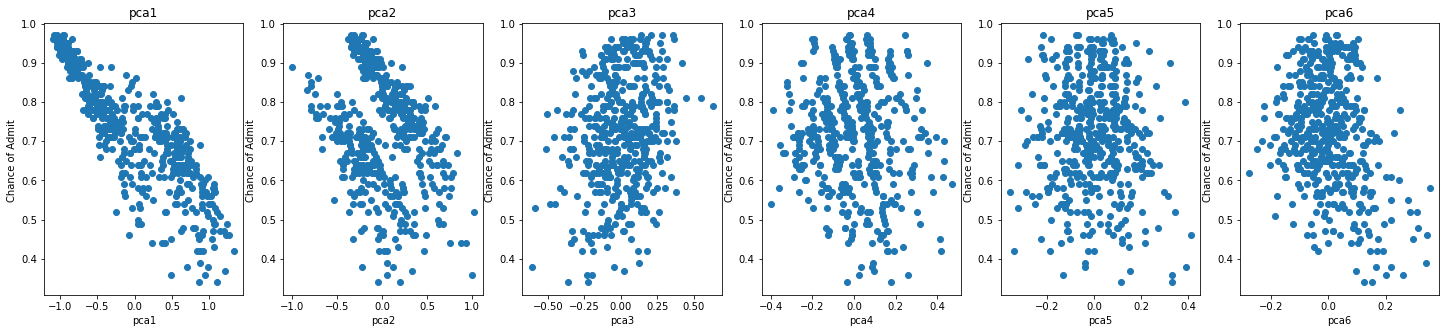

In [33]:
plt.figure(figsize=(25,5))

features = ['pca1', 'pca2','pca3','pca4','pca5','pca6']
target = Admit_df_final['Chance of Admit ']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = Admit_df_final[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Chance of Admit ')

In [34]:
X = pd.DataFrame(np.c_[Admit_df_final['pca1'],Admit_df_final['pca2'],Admit_df_final['pca3'],Admit_df_final['pca4'],Admit_df_final['pca5'],Admit_df_final['pca6']], columns = ['pca1','pca2','pca3','pca4','pca5','pca6'])
Y = Admit_df_final['Chance of Admit ']

In [35]:
# Splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(400, 6)
(100, 6)
(400,)
(100,)


In [36]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_train_predict =model.predict(X_train)
mse = mean_squared_error(Y_train, y_train_predict)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set:")
print("\n")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set:")
print("\n")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set:


MSE is 0.000666349368949578
RMSE is 0.025813743799564953
R2 score is 0.9661902950008857


The model performance for testing set:


MSE is 0.000666349368949578
RMSE is 0.02406461656895177
R2 score is 0.9716818694077913


## RFR with PCA

In [38]:
admission = pd.read_csv("https://raw.githubusercontent.com/sumeet020/chance-of-admit/main/Admission_Prediction.csv")
admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [39]:
admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [40]:
admission.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


array([[<AxesSubplot:title={'center':'Serial No.'}>,
        <AxesSubplot:title={'center':'GRE Score'}>,
        <AxesSubplot:title={'center':'TOEFL Score'}>],
       [<AxesSubplot:title={'center':'University Rating'}>,
        <AxesSubplot:title={'center':'SOP'}>,
        <AxesSubplot:title={'center':'LOR '}>],
       [<AxesSubplot:title={'center':'CGPA'}>,
        <AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Chance of Admit '}>]], dtype=object)

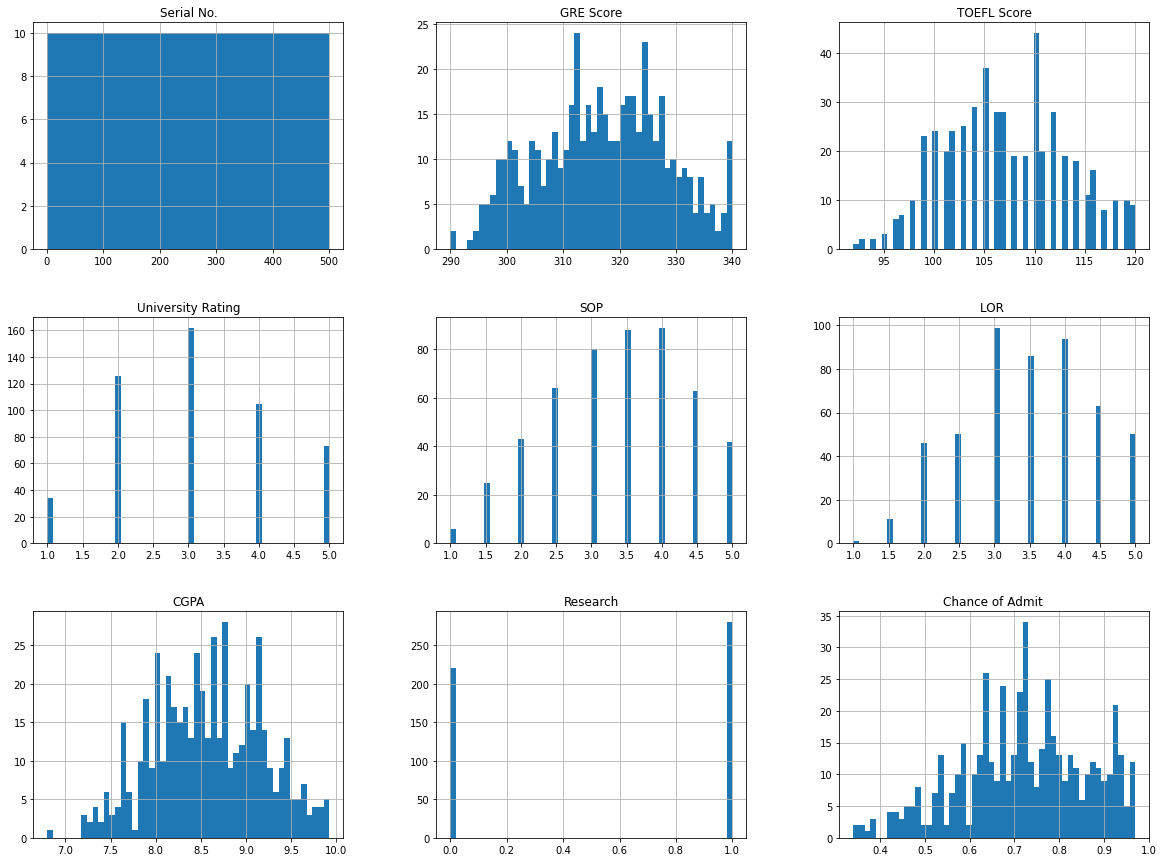

In [41]:
admission.hist(bins=50 ,figsize=(20,15))

In [42]:
corr_matrix = admission.corr()
corr_matrix['Chance of Admit '].sort_values(ascending=False)

admission_df = pd.DataFrame(admission)
admission_f = admission_df.drop('Serial No.', axis=1)
admission_f.describe()

corr_matrix = admission_f.corr()
corr_matrix['Chance of Admit '].sort_values(ascending=False)

Chance of Admit      1.000000
CGPA                 0.882413
GRE Score            0.810351
TOEFL Score          0.792228
University Rating    0.690132
SOP                  0.684137
LOR                  0.645365
Research             0.545871
Name: Chance of Admit , dtype: float64

In [43]:
from sklearn.preprocessing import StandardScaler
# Naming the features
features = ['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']

# Separating out the features
x = admission_f.loc[:,features].values

# Separating out the target
y = admission_f.loc[:,['Chance of Admit ']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [44]:
from sklearn.decomposition import PCA
# Determining principal components
pca = PCA(n_components=5)    #replace it with 6
PrincipalComponents = pca.fit_transform(x)
newdf = pd.DataFrame(data = PrincipalComponents, columns = ['pc1', 'pc2','pc3','pc4','pc5'])

finalDf = pd.concat([newdf,admission[['Chance of Admit ']]], axis = 1)

In [45]:
finalDf.head()

,pc1,pc2,pc3,pc4,pc5,Chance of Admit
0,-3.568375,-0.328318,-0.608675,-0.512976,-0.201642,0.92
1,-1.639199,0.034550,0.867234,-0.105140,0.208110,0.76
2,0.550991,-0.720794,0.940014,0.066577,0.227870,0.72
3,-0.345470,-1.280237,-0.390081,0.579390,-0.411583,0.80
4,2.035804,0.039366,-0.691749,-0.616976,0.423746,0.65


In [46]:
finalDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pc1               500 non-null    float64
 1   pc2               500 non-null    float64
 2   pc3               500 non-null    float64
 3   pc4               500 non-null    float64
 4   pc5               500 non-null    float64
 5   Chance of Admit   500 non-null    float64
dtypes: float64(6)
memory usage: 23.6 KB


In [47]:
pca.explained_variance_ratio_

array([0.67519343, 0.10596446, 0.08023255, 0.0543379 , 0.03766808])

In [48]:
#5
(0.67519343+0.10596446+0.08023255+0.0543379+0.03766808)*100

95.339642

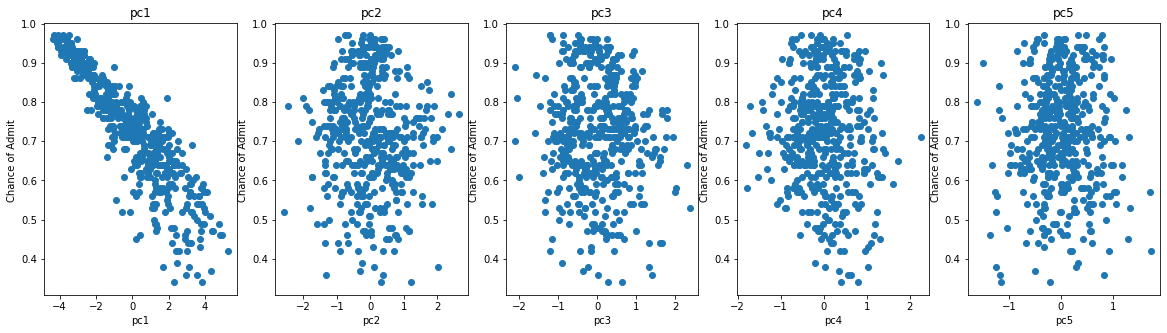

In [49]:
# Scatter Plot
plt.figure(figsize=(20, 5))

features = ['pc1', 'pc2','pc3','pc4','pc5']
target = finalDf['Chance of Admit ' ]

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = finalDf[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Chance of Admit ')

In [50]:
X = pd.DataFrame(np.c_[finalDf['pc1'],finalDf['pc2'],finalDf['pc3'],finalDf['pc4'],finalDf['pc5']], columns = ['pc1','pc2','pc3','pc4','pc5'])
Y = finalDf['Chance of Admit ']

In [51]:
# Splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(400, 5)
(100, 5)
(400,)
(100,)


In [52]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,Y_train)

RandomForestRegressor()

In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_train_predict =model.predict(X_train)
mse = mean_squared_error(Y_train, y_train_predict)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set:")
print("\n")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set:")
print("\n")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set:


MSE is 0.0005481620249999991
RMSE is 0.02341286024816274
R2 score is 0.9721869679471858


The model performance for testing set:


MSE is 0.0005481620249999991
RMSE is 0.06493243488427027
R2 score is 0.7938278190709047
